In [133]:
#import libs
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [134]:
#read the file
df = pd.read_csv("/content/saudi-pro-league-transfers.csv")

In [135]:
#check nulls
df.isnull().sum()

club_name               0
player_name             0
age                   103
position                0
club_involved_name      0
fee                    14
transfer_movement       0
transfer_period         0
league_name             0
season                  0
country                 0
dtype: int64

In [136]:
#1 to fill age nulls
Avg_Ages = df.groupby(['position']).agg(
    avg_ag=('age', 'mean'),
).reset_index().round({'avg_ag': 0})

In [137]:
Avg_Ages

,position,avg_ag
0,Attack,26.0
1,Attacking Midfield,27.0
2,Central Midfield,26.0
3,Centre-Back,27.0
4,Centre-Forward,27.0
5,Defence,26.0
6,Defensive Midfield,26.0
7,Goalkeeper,27.0
8,Left Midfield,26.0
9,Left Winger,25.0


In [138]:
#2 to fill ages nulls
position_avg_age = Avg_Ages.set_index('position')['avg_ag'].to_dict()

# Fill null values based on average ages for the same position
df['age'] = df.apply(lambda row: position_avg_age[row['position']] if pd.isnull(row['age']) else row['age'], axis=1)
df.isnull().sum()


club_name              0
player_name            0
age                    0
position               0
club_involved_name     0
fee                   14
transfer_movement      0
transfer_period        0
league_name            0
season                 0
country                0
dtype: int64

In [139]:
df.dropna(subset=['fee'], inplace=True)

In [140]:
df.isnull().sum()

club_name             0
player_name           0
age                   0
position              0
club_involved_name    0
fee                   0
transfer_movement     0
transfer_period       0
league_name           0
season                0
country               0
dtype: int64

In [141]:
df

,club_name,player_name,age,position,club_involved_name,fee,transfer_movement,transfer_period,league_name,season,country
0,Al-Hilal SFC,Khaled Aziz,18.0,Defensive Midfield,Unknown,?,in,Summer,Saudi Professional League,2000/2001,Saudi Arabia
1,Al-Hilal SFC,Sami Al-Jaber,27.0,Centre-Forward,Wolves,loan transfer,out,Summer,Saudi Professional League,2000/2001,Saudi Arabia
2,Al-Hilal SFC,Fahad Al-Ghesheyan,26.0,Right Winger,Al-Nassr,-,out,Summer,Saudi Professional League,2000/2001,Saudi Arabia
3,Al-Hilal SFC,Saleh Al-Salloumi,37.0,Goalkeeper,Retired,-,out,Summer,Saudi Professional League,2000/2001,Saudi Arabia
4,Al-Hilal SFC,Elijah Litana,29.0,Centre-Back,Retired,-,out,Summer,Saudi Professional League,2000/2001,Saudi Arabia
...,...,...,...,...,...,...,...,...,...,...,...
7853,Al-Raed SFC,Mamadou Loum,27.0,Defensive Midfield,FC Porto,"End of loanJun 30, 2024",out,Summer,Saudi Professional League,2024/2025,Saudi Arabia
7854,Al-Ettifaq FC,Rayan Al-Bloushi,23.0,Centre-Forward,Al-Safa,"End of loanJun 30, 2024",in,Summer,Saudi Professional League,2024/2025,Saudi Arabia
7855,Al-Taawoun FC,Flávio,28.0,Central Midfield,Trabzonspor,"End of loanJun 30, 2024",out,Summer,Saudi Professional League,2024/2025,Saudi Arabia
7856,Al-Taawoun FC,Muath Faquihi,22.0,Left-Back,Al-Hilal,"End of loanJun 30, 2024",out,Summer,Saudi Professional League,2024/2025,Saudi Arabia


In [142]:
re_fun = lambda x: pd.to_numeric(str(x).replace('€', '').replace('m', ''), errors='coerce') if pd.notnull(x) else x
df['fee'] = df['fee'].apply(re_fun)


In [143]:
df.isnull().sum()

club_name                0
player_name              0
age                      0
position                 0
club_involved_name       0
fee                   7577
transfer_movement        0
transfer_period          0
league_name              0
season                   0
country                  0
dtype: int64

In [144]:
df.groupby(['position']).agg(
    _deal=('fee', 'sum'),
).reset_index()
#We see here the three postions(Sweeper, Right Midfield and Defence) are Not making any fee or price so
# I will drop it because its Not complete due to on or more of these columns: Fee, club_involved_name


,position,_deal
0,Attack,0.00
1,Attacking Midfield,183.55
2,Central Midfield,119.40
3,Centre-Back,125.20
4,Centre-Forward,281.43
5,Defence,0.00
6,Defensive Midfield,219.92
7,Goalkeeper,27.22
8,Left Midfield,1.50
9,Left Winger,251.63


In [145]:
df['position'].value_counts()

Centre-Forward        1406
Centre-Back           1065
Defensive Midfield     790
Attacking Midfield     623
Right-Back             612
Goalkeeper             568
Left-Back              547
Central Midfield       460
Right Winger           398
Left Winger            368
Midfield               271
Right Midfield         189
Defence                171
Second Striker         146
Attack                 122
Left Midfield          106
Sweeper                  2
Name: position, dtype: int64

In [146]:
#New conditional col
# Define the conditions and corresponding values for the new column
conditions = [
    df['position'].isin(['Centre-Forward', 'Second Striker', 'Attack']),
    df['position'].isin(['Midfield', 'Attacking Midfield', 'Central Midfield',
                         'Defensive Midfield', 'Left Midfield', 'Left Winger',
                         'Right Midfield', 'Right Winger']),
    df['position'].isin(['Sweeper', 'Defence', 'Left-Back', 'Right-Back', 'Centre-Back']),
    df['position'] == 'Goalkeeper'
]
values = ['Forwards', 'Midfielders', 'Defenders', 'Goalkeeper']

# Create a new column 'position_category' based on the conditions
df['position_category'] = np.select(conditions, values, default=np.nan)


In [147]:
#1 to fill fee nulls
Avg_Fees = df.groupby(['position_category']).agg(
    avg_fee=('fee', 'mean'),
).reset_index().round({'avg_fee': 0})

#2 to fill ages nulls
position_avg_fee = Avg_Fees.set_index('position_category')['avg_fee'].to_dict()

# Fill null values based on average fee for the same position
df['fee'] = df.apply(lambda row: position_avg_fee[row['position_category']] if pd.isnull(row['fee']) else row['fee'], axis=1)
df.isnull().sum()

club_name             0
player_name           0
age                   0
position              0
club_involved_name    0
fee                   0
transfer_movement     0
transfer_period       0
league_name           0
season                0
country               0
position_category     0
dtype: int64

In [148]:
df

,club_name,player_name,age,position,club_involved_name,fee,transfer_movement,transfer_period,league_name,season,country,position_category
0,Al-Hilal SFC,Khaled Aziz,18.0,Defensive Midfield,Unknown,7.0,in,Summer,Saudi Professional League,2000/2001,Saudi Arabia,Midfielders
1,Al-Hilal SFC,Sami Al-Jaber,27.0,Centre-Forward,Wolves,3.0,out,Summer,Saudi Professional League,2000/2001,Saudi Arabia,Forwards
2,Al-Hilal SFC,Fahad Al-Ghesheyan,26.0,Right Winger,Al-Nassr,7.0,out,Summer,Saudi Professional League,2000/2001,Saudi Arabia,Midfielders
3,Al-Hilal SFC,Saleh Al-Salloumi,37.0,Goalkeeper,Retired,4.0,out,Summer,Saudi Professional League,2000/2001,Saudi Arabia,Goalkeeper
4,Al-Hilal SFC,Elijah Litana,29.0,Centre-Back,Retired,4.0,out,Summer,Saudi Professional League,2000/2001,Saudi Arabia,Defenders
...,...,...,...,...,...,...,...,...,...,...,...,...
7853,Al-Raed SFC,Mamadou Loum,27.0,Defensive Midfield,FC Porto,7.0,out,Summer,Saudi Professional League,2024/2025,Saudi Arabia,Midfielders
7854,Al-Ettifaq FC,Rayan Al-Bloushi,23.0,Centre-Forward,Al-Safa,3.0,in,Summer,Saudi Professional League,2024/2025,Saudi Arabia,Forwards
7855,Al-Taawoun FC,Flávio,28.0,Central Midfield,Trabzonspor,7.0,out,Summer,Saudi Professional League,2024/2025,Saudi Arabia,Midfielders
7856,Al-Taawoun FC,Muath Faquihi,22.0,Left-Back,Al-Hilal,4.0,out,Summer,Saudi Professional League,2024/2025,Saudi Arabia,Defenders


In [149]:
#Split the season column to reach the 1st year only
df['year'] = df['season'].apply(lambda x: x.split('/')[0])

In [150]:
#Top 10 transfers clubs
df['club_name'].value_counts().head(10)

Ittihad Club     640
Al-Ahli SFC      595
Al-Nassr FC      567
Al-Shabab FC     542
Al-Hilal SFC     540
Al-Raed SFC      497
Al-Ettifaq FC    472
Al-Taawoun FC    429
Al-Faisaly FC    425
Al-Fateh SC      376
Name: club_name, dtype: int64

In [151]:
#Top 5 clubs in attracting players
df[df['transfer_movement'] == 'in']['club_name'].value_counts().head(5)

Ittihad Club    317
Al-Ahli SFC     295
Al-Nassr FC     281
Al-Hilal SFC    266
Al-Shabab FC    263
Name: club_name, dtype: int64

In [152]:
#Top five clubs in Alienate players
df[df['transfer_movement'] == 'out']['club_name'].value_counts().head(5)

Ittihad Club    323
Al-Ahli SFC     300
Al-Nassr FC     286
Al-Shabab FC    279
Al-Hilal SFC    274
Name: club_name, dtype: int64

In [153]:
df[df['transfer_movement'] == 'in'].nlargest(5, 'fee')

,club_name,player_name,age,position,club_involved_name,fee,transfer_movement,transfer_period,league_name,season,country,position_category,year
7652,Al-Hilal SFC,Neymar,31.0,Left Winger,Paris SG,90.0,in,Summer,Saudi Professional League,2023/2024,Saudi Arabia,Midfielders,2023
7653,Al-Hilal SFC,Malcom,26.0,Right Winger,Zenit S-Pb,60.0,in,Summer,Saudi Professional League,2023/2024,Saudi Arabia,Midfielders,2023
7654,Al-Hilal SFC,Rúben Neves,26.0,Defensive Midfield,Wolves,55.0,in,Summer,Saudi Professional League,2023/2024,Saudi Arabia,Midfielders,2023
7596,Ittihad Club,Fabinho,29.0,Defensive Midfield,Liverpool,46.7,in,Summer,Saudi Professional League,2023/2024,Saudi Arabia,Midfielders,2023
7655,Al-Hilal SFC,Sergej Milinković-Savić,28.0,Central Midfield,Lazio,40.0,in,Summer,Saudi Professional League,2023/2024,Saudi Arabia,Midfielders,2023


In [154]:
df[df['transfer_movement'] == 'out'].nlargest(5, 'fee')

,club_name,player_name,age,position,club_involved_name,fee,transfer_movement,transfer_period,league_name,season,country,position_category,year
2870,Al-Hilal SFC,Thiago Neves,30.0,Attacking Midfield,Al-Jazira,11.0,out,Summer,Saudi Professional League,2015/2016,Saudi Arabia,Midfielders,2015
1988,Al-Ettifaq FC,Yahya Al-Shehri,23.0,Attacking Midfield,Al-Nassr,9.8,out,Summer,Saudi Professional League,2013/2014,Saudi Arabia,Midfielders,2013
2,Al-Hilal SFC,Fahad Al-Ghesheyan,26.0,Right Winger,Al-Nassr,7.0,out,Summer,Saudi Professional League,2000/2001,Saudi Arabia,Midfielders,2000
9,Ittihad Club,Darci,31.0,Left Winger,Antalyaspor,7.0,out,Summer,Saudi Professional League,2000/2001,Saudi Arabia,Midfielders,2000
11,Ittihad Club,Roberto Donadoni,36.0,Right Midfield,Retired,7.0,out,Summer,Saudi Professional League,2000/2001,Saudi Arabia,Midfielders,2000


<ipython-input-155-d27723dd8ddd>:14: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(Top_n['player_name'], rotation=90, ha='right')  # Rotate x-axis labels for better readability
<ipython-input-155-d27723dd8ddd>:21: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_xticklabels(Top_o['player_name'], rotation=90, ha='right')  # Rotate x-axis labels for better readability


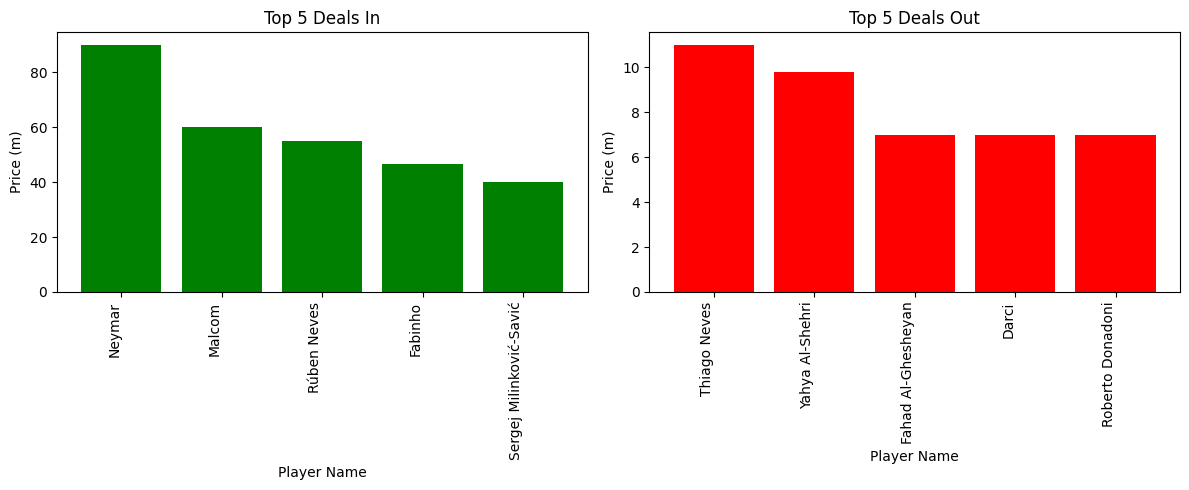

In [155]:
# Data for incoming transfers
Top_n = df[df['transfer_movement'] == 'in'].nlargest(5, 'fee')
# Data for outgoing transfers
Top_o = df[df['transfer_movement'] == 'out'].nlargest(5, 'fee')

# Create subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

# Plot incoming transfers with data labels
bars1 = ax1.bar(Top_n['player_name'], Top_n['fee'], color='green')
ax1.set_title('Top 5 Deals In')
ax1.set_ylabel('Price (m)')
ax1.set_xlabel('Player Name')
ax1.set_xticklabels(Top_n['player_name'], rotation=90, ha='right')  # Rotate x-axis labels for better readability

# Plot outgoing transfers with data labels
bars2 = ax2.bar(Top_o['player_name'], Top_o['fee'], color='red')
ax2.set_title('Top 5 Deals Out')
ax2.set_ylabel('Price (m)')
ax2.set_xlabel('Player Name')
ax2.set_xticklabels(Top_o['player_name'], rotation=90, ha='right')  # Rotate x-axis labels for better readability


# Adjust layout
plt.tight_layout()

# Show plot
plt.show()


In [156]:
#We see prices increase when a player is coming to the Saudi League by 300% and more, to be out of it.

In [157]:
#First try if is it work group the data by club name, then add 2 column number of deals, avg_prices with the right function
#then jus add like a filter to only top 5
df.groupby(['club_name']).agg(
    num_deals=('fee', 'count'),
    total_price=('fee', 'sum')
).nlargest(5, 'num_deals').reset_index()

,club_name,num_deals,total_price
0,Ittihad Club,640,3205.90
1,Al-Ahli SFC,595,3071.77
2,Al-Nassr FC,567,2832.34
3,Al-Shabab FC,542,2681.91
4,Al-Hilal SFC,540,2849.31


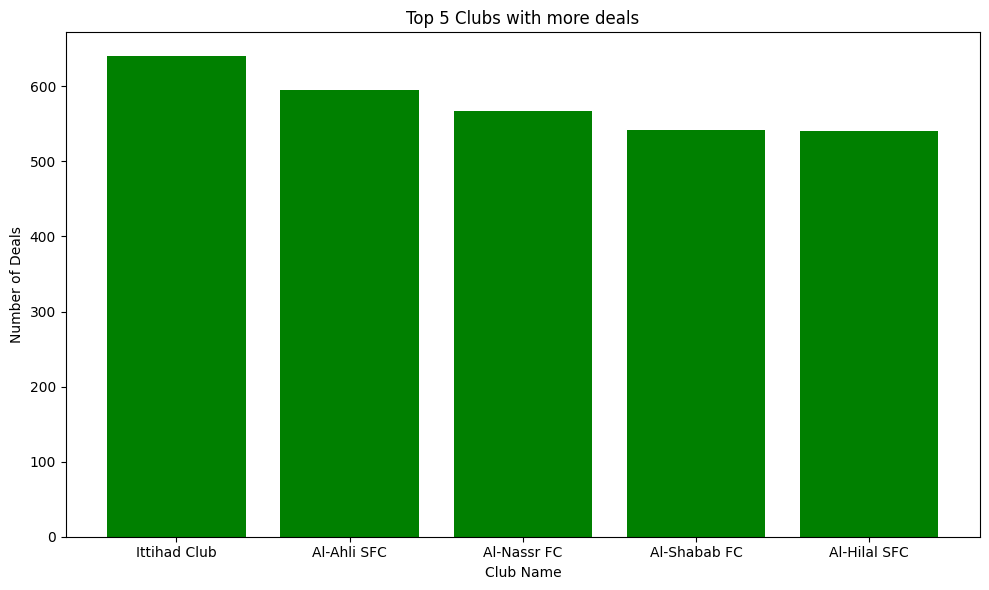

In [158]:
#Add the above result in df
top_5_clubs = df.groupby(['club_name']).agg(
    num_deals=('fee', 'count'),
    total_price=('fee', 'sum')
).nlargest(5, 'num_deals').reset_index()

# Create bar chart for num_deals column
plt.figure(figsize=(10, 6))
plt.bar(top_5_clubs['club_name'], top_5_clubs['num_deals'], color='green')
plt.title('Top 5 Clubs with more deals')
plt.xlabel('Club Name')
plt.ylabel('Number of Deals')
plt.tight_layout()
plt.show()

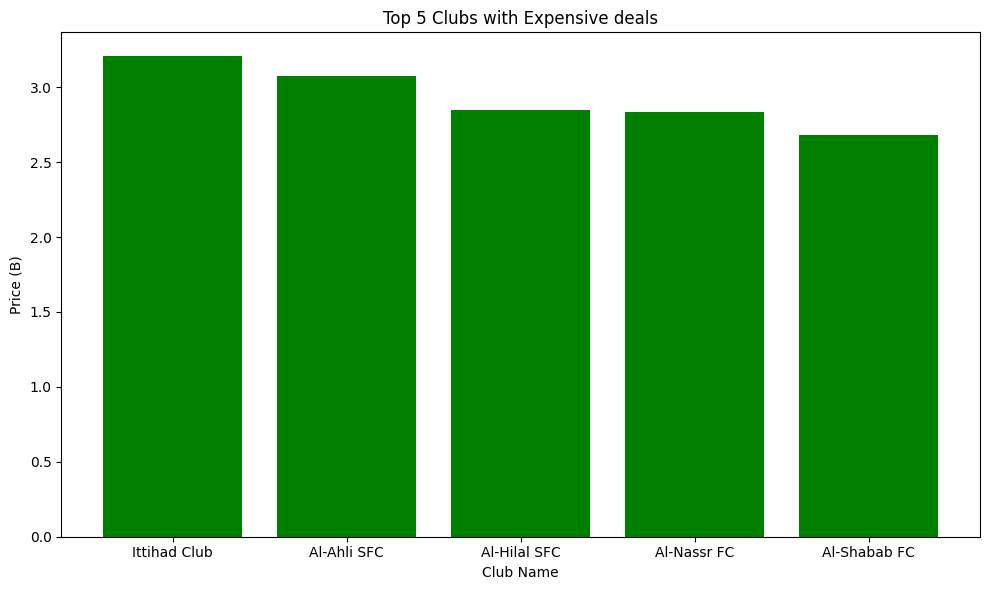

In [159]:
top_5_clubs2 = df.groupby(['club_name']).agg(
    num_deals=('fee', 'count'),
    total_price=('fee', 'sum')
).nlargest(5, 'total_price').reset_index()

# Modify the total price values to be in billions
top_5_clubs2['total_price'] = top_5_clubs2['total_price'] / 1000

# Create the bar chart for avrg price column
plt.figure(figsize=(10, 6))
plt.bar(top_5_clubs2['club_name'], top_5_clubs2['total_price'], color='green')
plt.title('Top 5 Clubs with Expensive deals')
plt.xlabel('Club Name')
plt.ylabel('Price (B)')
plt.tight_layout()

# Show the plot
plt.show()



In [160]:
#Define the conditions and  ratings
conditions = [
    (df['fee'] >= 0) & (df['fee'] < 10),
    (df['fee'] >= 10) & (df['fee'] < 35),
    (df['fee'] >= 35)
]

ratings = ['Low', 'Mid', 'High']

#Create a new 'rating_transfer' column based on the conditions and ratings
df['rating_deal'] = np.select(conditions, ratings, default=np.nan)

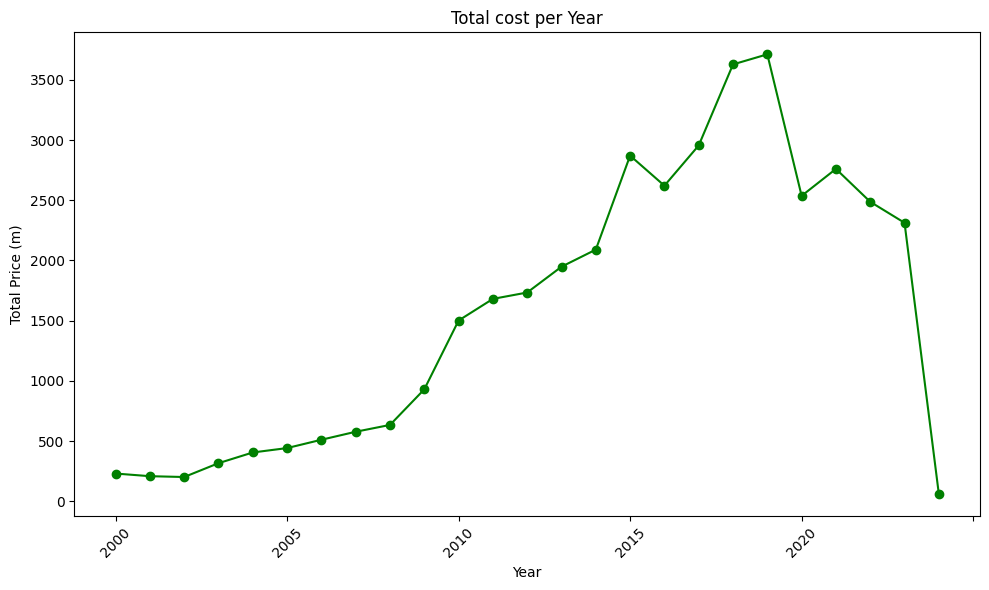

In [161]:
Total_per_year= df.groupby('year')['fee'].sum()

# Create a line plot for the total fee per year
Total_per_year.plot(kind='line', marker='o', xlabel='Year', ylabel='Total Price (m)', title='Total cost per Year', figsize=(10, 6), color='green')

# Display the plot
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [162]:
df.groupby(['year','transfer_period'])['fee'].sum()


year  transfer_period
2000  Summer              152.00
      Winter               78.00
2001  Summer              180.00
      Winter               28.00
2002  Summer              106.00
      Winter               95.10
2003  Summer              220.00
      Winter               96.00
2004  Summer              297.00
      Winter              108.00
2005  Summer              303.60
      Winter              138.00
2006  Summer              387.70
      Winter              123.00
2007  Summer              425.14
      Winter              152.00
2008  Summer              478.25
      Winter              155.60
2009  Summer              695.50
      Winter              234.00
2010  Summer             1095.26
      Winter              406.00
2011  Summer             1250.03
      Winter              431.00
2012  Summer             1304.00
      Winter              430.00
2013  Summer             1547.10
      Winter              401.20
2014  Summer             1600.55
      Winter         

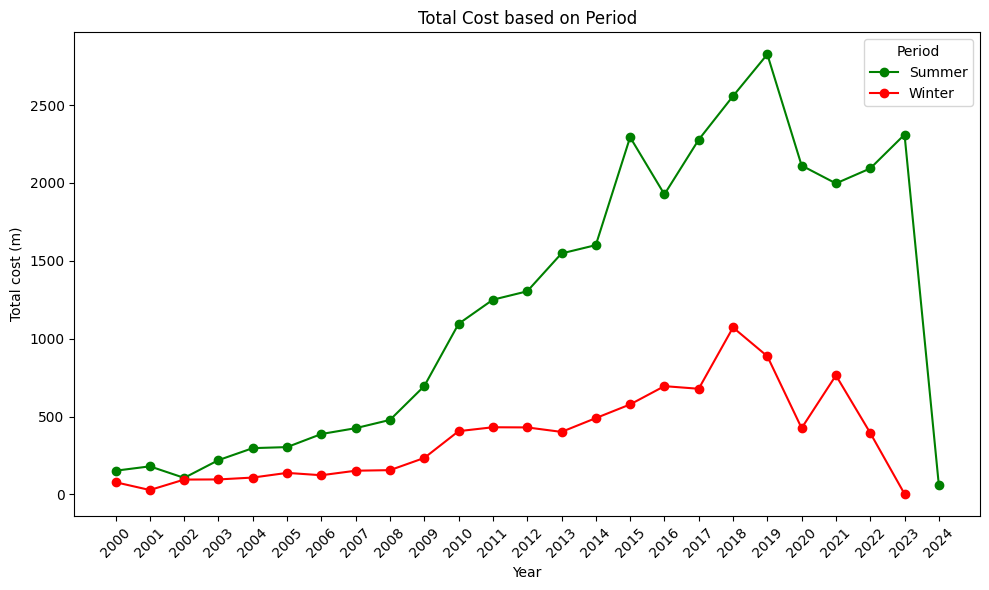

In [163]:
# Group the data by year and transfer period and calculate the total fee per period
Total_per_period = df.groupby(['year', 'transfer_period'])['fee'].sum()

# Unstack the multi-index to separate transfer periods into columns
Total_per_period_unstacked = Total_per_period.unstack()

# Create subplots for each transfer period
fig, ax = plt.subplots(figsize=(10, 6))

# Define colors for each transfer period
colors = ['green', 'red']  # Add more colors if needed

# Plot each transfer period with a different color
for i, period in enumerate(Total_per_period_unstacked.columns):
    ax.plot(Total_per_period_unstacked.index, Total_per_period_unstacked[period], marker='o', label=period, color=colors[i])

# Set labels and title
ax.set_xlabel('Year')
ax.set_ylabel('Total cost (m)')
ax.set_title('Total Cost based on Period')
ax.legend(title='Period')

# Show the plot
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()




In [ ]:
#The period between 2009 -2020 have a huge spike.

In [164]:
#It just the way how I work in next cell
#df.groupby(['club_name']).agg(
    #num_deals=('fee', 'count'),
    #avg_price=('fee', 'mean'),
    #percent=()
#).nlargest(5, 'avg_price').reset_index()

In [165]:
# Calculate total number of deals
t_num_deals = df['fee'].count()

# Group the data by club_name and calculate num_deals and avg_price
grouped_data = df.groupby(['club_name']).agg(
    num_deals=('fee', 'count')
)

# Calculate percentage of num_deals for each club
grouped_data['percent'] = (grouped_data['num_deals'].round() / t_num_deals) * 100
grouped_data['percentage'] = (grouped_data['percent']).astype(int).astype(str) + '%'
grouped_data

,num_deals,percent,percentage
club_name,,,
Abha Club,143,1.823049,1%
Al-Adalah FC,84,1.070882,1%
Al-Ahli SFC,595,7.585416,7%
Al-Ain FC,37,0.471698,0%
Al-Ansar,24,0.305966,0%
Al-Batin FC,202,2.575217,2%
Al-Ettifaq FC,472,6.017338,6%
Al-Faisaly FC,425,5.418154,5%
Al-Fateh SC,376,4.793473,4%


In [166]:
percent_df = grouped_data.nlargest(10,'percent').reset_index()

In [167]:
percent_df.drop(columns=['percent'], inplace=True)


In [168]:
percent_df

,club_name,num_deals,percentage
0,Ittihad Club,640,8%
1,Al-Ahli SFC,595,7%
2,Al-Nassr FC,567,7%
3,Al-Shabab FC,542,6%
4,Al-Hilal SFC,540,6%
5,Al-Raed SFC,497,6%
6,Al-Ettifaq FC,472,6%
7,Al-Taawoun FC,429,5%
8,Al-Faisaly FC,425,5%
9,Al-Fateh SC,376,4%


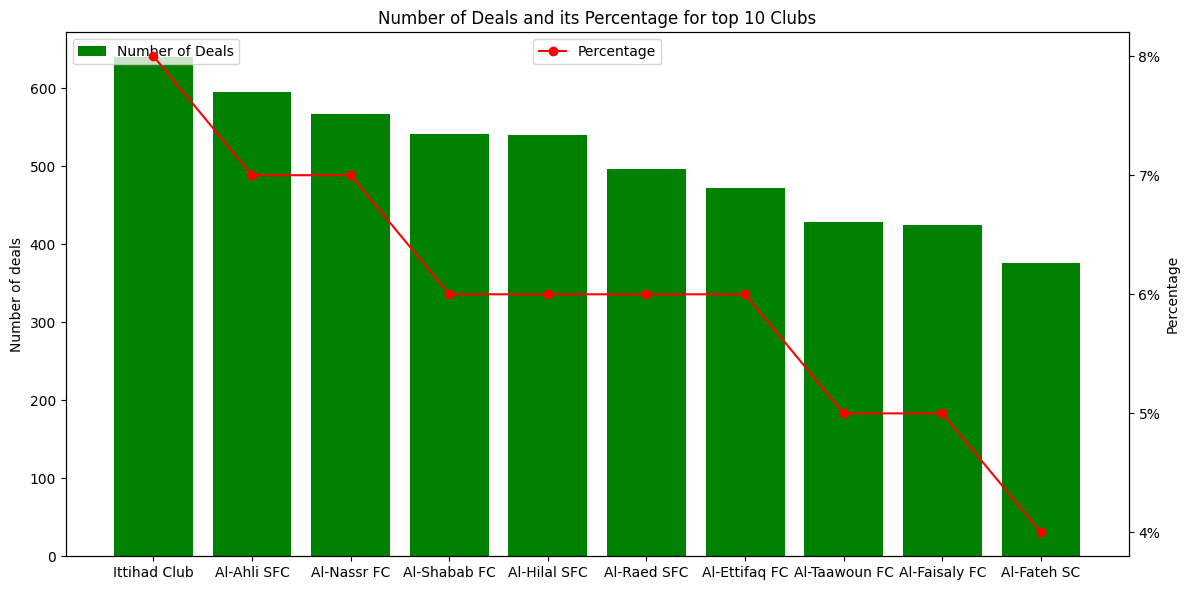

In [169]:
# Create a figure and axis object
fig, ax1 = plt.subplots(figsize=(12, 6))

# Plot the percentage as a line chart
ax1.bar(percent_df['club_name'], percent_df['num_deals'], color='green', label='Number of Deals')
ax1.set_ylabel('Number of deals', color='black')

# Reverse the order of the values for percentage
percent_df_reverse = percent_df.iloc[::-1]

# Create a secondary y-axis for num_deals as a clustered column chart
ax2 = ax1.twinx()
ax2.plot(percent_df_reverse['percentage'], marker='o', color='red', label='Percentage')
ax2.set_ylabel('Percentage', color='black')
ax2.set_xlabel('Club Name')
ax2.set_title('Number of Deals and its Percentage for top 10 Clubs')

# Show legend
ax1.legend(loc='upper left')
ax2.legend(loc='upper center')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Show the plot
plt.tight_layout()
plt.show()



In [172]:
deals_avg = df.groupby(['rating_deal']).agg(
    avr_deal=('fee', 'mean'),
).reset_index().round({'avr_deal': 0})


In [173]:
deals_avg

,rating_deal,avr_deal
0,High,54.0
1,Low,5.0
2,Mid,18.0


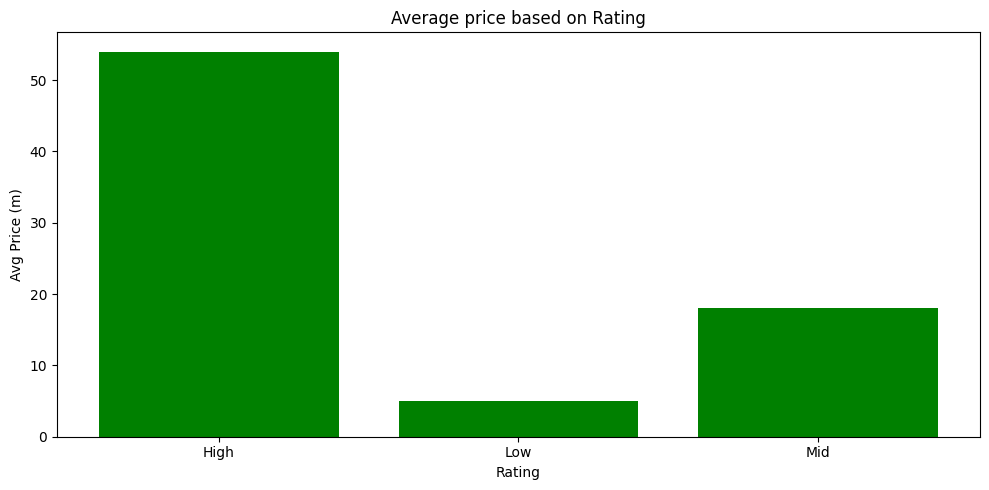

In [183]:
# Create the bar chart
plt.figure(figsize=(10, 5))
plt.bar(deals_avg['rating_deal'], deals_avg['avr_deal'], color='green')
plt.title('Average price based on Rating')
plt.xlabel('Rating')
plt.ylabel('Avg Price (m)')
plt.tight_layout()

# Show the plot
plt.show()

In [188]:
age_avg = df.groupby(['age']).agg(
    avr_deal=('fee', 'mean')
).reset_index()

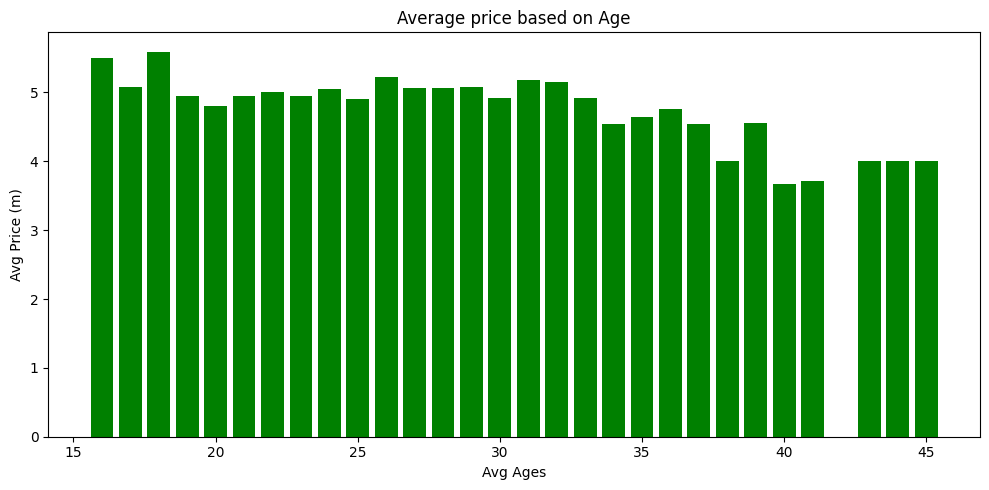

In [190]:
# Create the bar chart
plt.figure(figsize=(10, 5))
plt.bar(age_avg['age'], age_avg['avr_deal'], color='green')
plt.title('Average price based on Age')
plt.xlabel('Avg Ages')
plt.ylabel('Avg Price (m)')
plt.tight_layout()

# Show the plot
plt.show()

In [187]:
#Just to cheack for 42 and 15
df.groupby('age')['fee'].mean()

age
16.0    5.500000
17.0    5.083333
18.0    5.594203
19.0    4.948000
20.0    4.804167
21.0    4.948479
22.0    5.000424
23.0    4.945994
24.0    5.047515
25.0    4.899246
26.0    5.228936
27.0    5.059385
28.0    5.069692
29.0    5.079281
30.0    4.921767
31.0    5.184423
32.0    5.145338
33.0    4.920245
34.0    4.545455
35.0    4.643836
36.0    4.760870
37.0    4.541667
38.0    4.000000
39.0    4.555556
40.0    3.666667
41.0    3.714286
43.0    4.000000
44.0    4.000000
45.0    4.000000
Name: fee, dtype: float64

In [177]:
deals_avg2 = df.groupby(['position']).agg(
    avr_deal=('fee', 'mean'),
).reset_index()


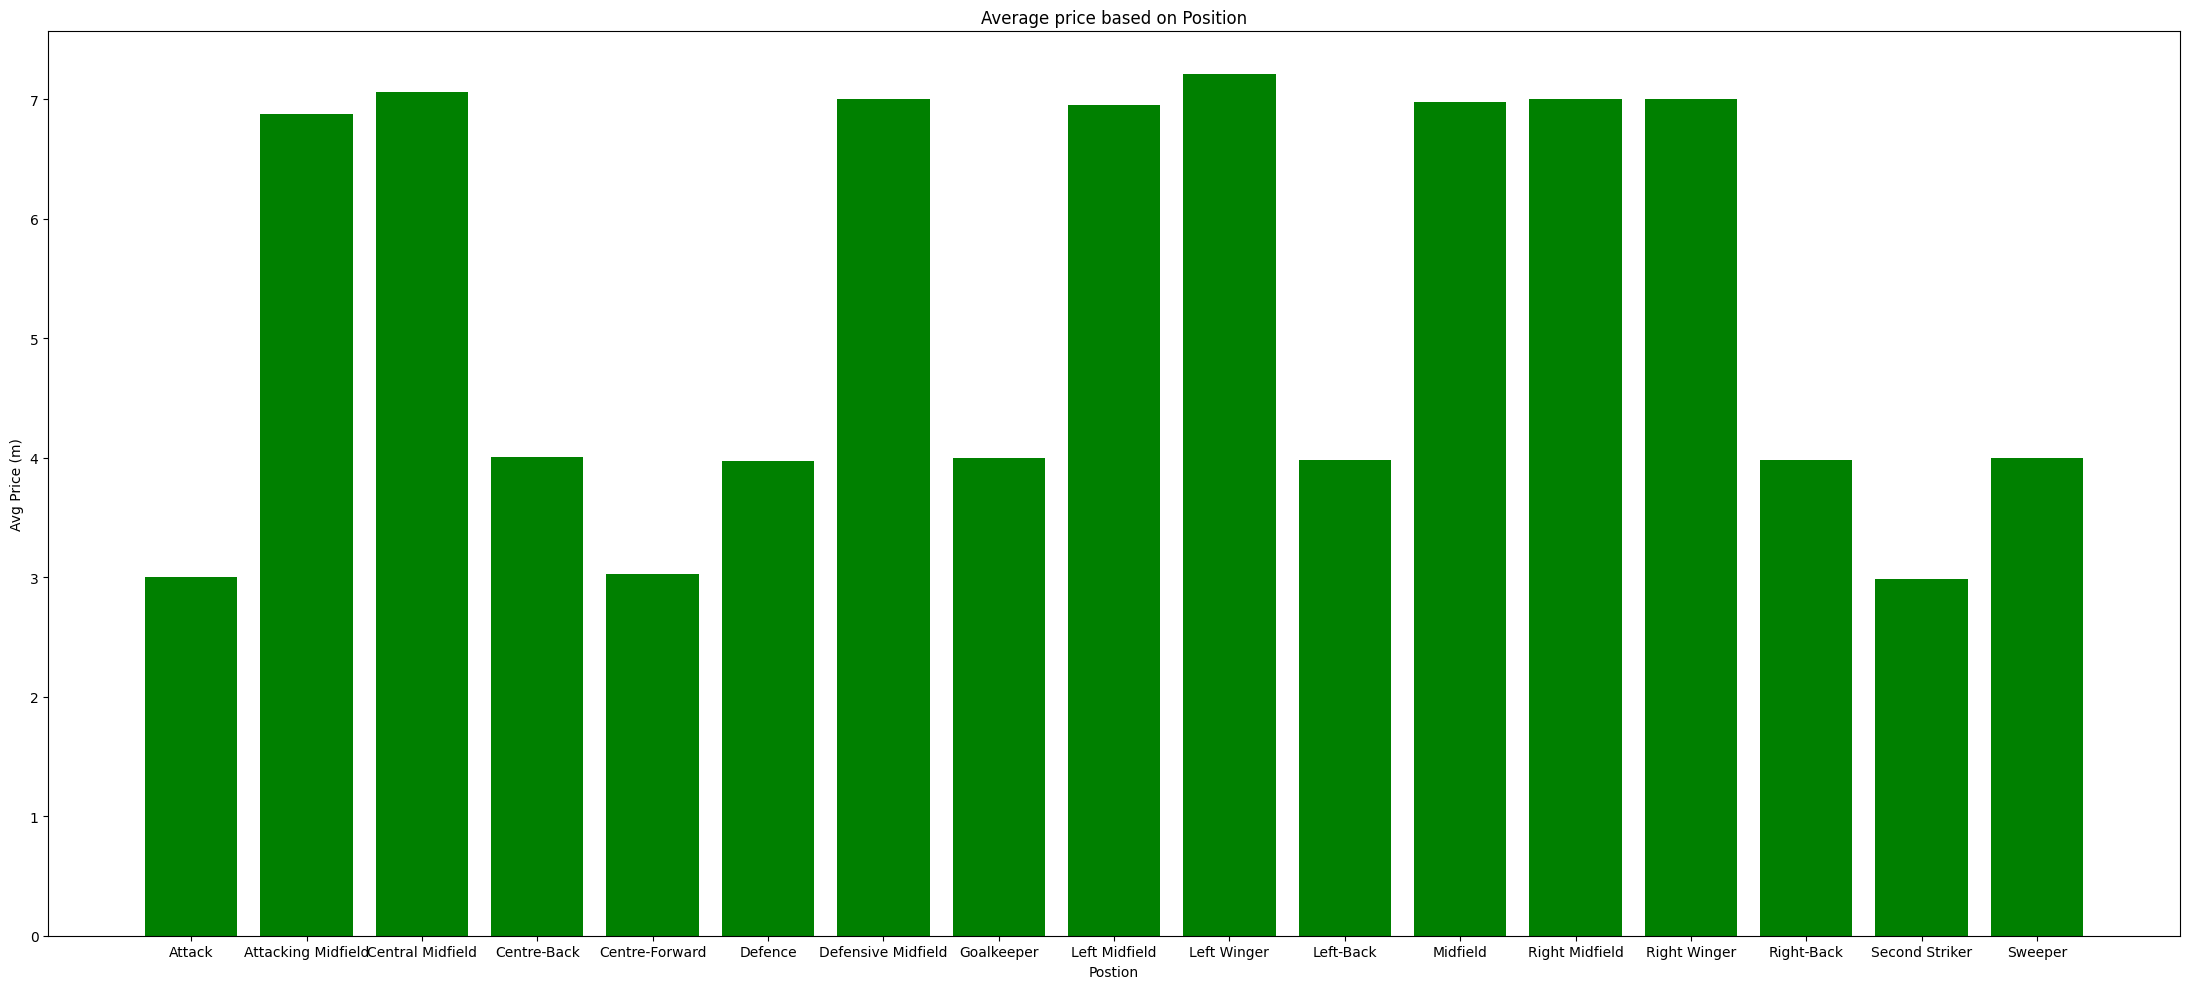

In [193]:
# Create the bar chart
plt.figure(figsize=(22, 10))
plt.bar(deals_avg2['position'], deals_avg2['avr_deal'], color='green')
plt.title('Average price based on Position')
plt.xlabel('Postion')
plt.ylabel('Avg Price (m)')
plt.tight_layout()

# Show the plot
plt.show()

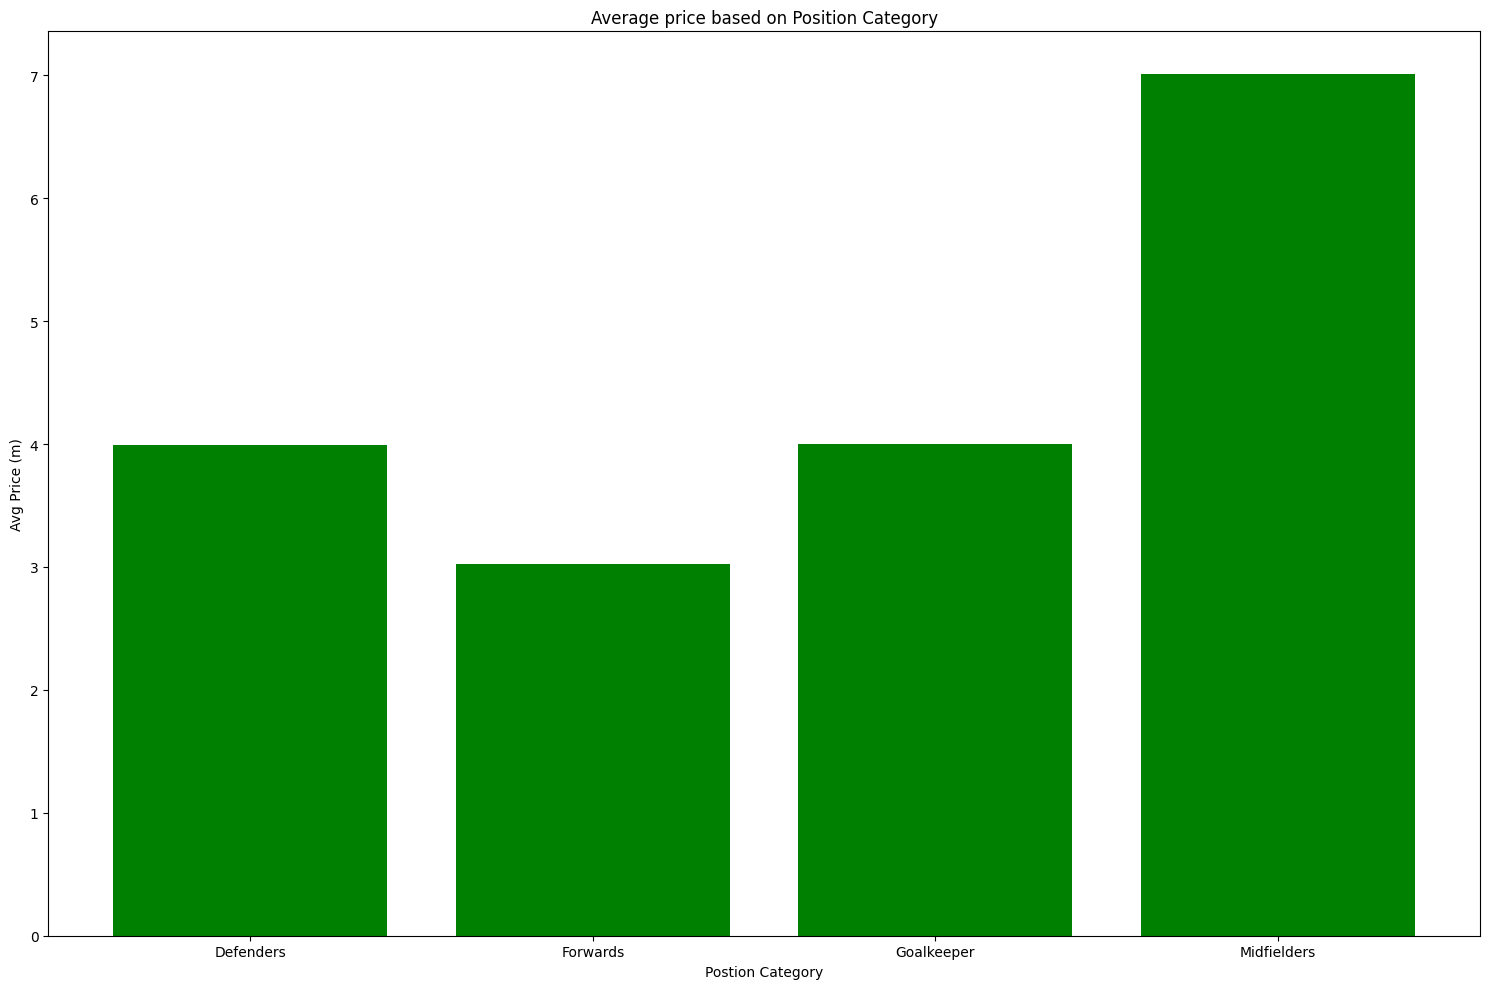

In [195]:
deals_avg3 = df.groupby(['position_category']).agg(
    avr_deal=('fee', 'mean'),
).reset_index()
# Create the bar chart
plt.figure(figsize=(15, 10))
plt.bar(deals_avg3['position_category'], deals_avg3['avr_deal'], color='green')
plt.title('Average price based on Position Category')
plt.xlabel('Postion Category')
plt.ylabel('Avg Price (m)')
plt.tight_layout()

# Show the plot
plt.show()
#We see the most positions cost more are the Midfielders